In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import scipy.io.wavfile
import copy
from scipy import optimize
import cv2
%matplotlib inline
from scipy import ndimage, misc
from numpy.fft import rfft
from scipy.signal import butter, lfilter
from matplotlib.pyplot import loglog

In [3]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
frames=np.load('/home/boston/PycharmProjects/ippg/frames.npy')
faces=np.load('/home/boston/PycharmProjects/ippg/face_frames.npy', allow_pickle=True)
green_frames=[frame[:,:,1] for frame in faces]



FileNotFoundError: [Errno 2] No such file or directory: '/home/boston/PycharmProjects/ippg/frames.npy'

In [5]:
filt_green=[ndimage.uniform_filter(frame, size=15) for frame in green_frames]


NameError: name 'green_frames' is not defined

In [6]:
plt.imshow(filt_green[4])

NameError: name 'filt_green' is not defined

In [7]:
def get_pixel_amplitude(row,column, frames):
    for i, frame in enumerate(frames):
        signal = np.zeros(len(frames))
        ROI=frame[row, column]
        signal[i]=ROI
    
    lin = lambda x, a, b : a * x + b 
    coeff, _ = optimize.curve_fit(lin,time, signal)
    signal= signal-( coeff[0] * time + coeff[1])
    
    fs = 30
    lowcut = 0.5
    highcut=6
    filtered = butter_bandpass_filter(g_signal, lowcut, highcut, fs, order=4)
    detrend_filterred=butter_bandpass_filter(signal, lowcut, highcut, fs, order=4)
    
    Fs=30
    length=num_frames/Fs
    n=np.arange(0,length,1/Fs)
    f=1.3
    y=np.exp(2*1j*np.pi*f*n)
    
    mul=np.multiply(y,detrend_filterred)
    
    
    return np.absolute(mul).sum()

In [20]:
def get_pixel_amplitude(row,column, frames):
    for i, frame in enumerate(frames):
        signal = np.zeros(len(frames))
        ROI=frame[row, column]
        signal[i]=ROI
        return (signal)

In [33]:
g=get_pixel_amplitude(100, 300,filt_green)

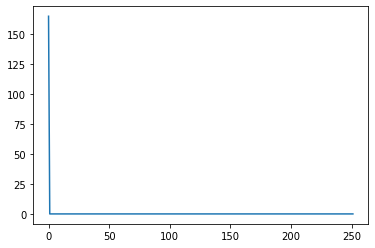

In [34]:
plt.plot(g)

In [206]:
image=np.zeros([filt_green[4].shape[0],filt_green[4].shape[1]])
for row in range(840):
    for col in range(610):
        image[row,col]=get_pixel_amplitude(row, col,filt_green)
        if (row%10==0 and col%500==0):
            print (f' row {row} completed value is {image[row,col]}')

 row 0 completed value is 17.676863515024326
 row 0 completed value is 4.617092372626431
 row 10 completed value is 17.544946622527675
 row 10 completed value is 4.2213415989552185
 row 20 completed value is 17.41302973004179
 row 20 completed value is 3.561756976188012
 row 30 completed value is 17.017281844961243
 row 30 completed value is 5.144760070846667
 row 40 completed value is 17.544946622527675
 row 40 completed value is 6.859680090060378
 row 50 completed value is 17.544946622527675
 row 50 completed value is 10.421434427969754
 row 60 completed value is 17.676863515024326
 row 60 completed value is 12.66402160033353
 row 70 completed value is 17.41302973004179
 row 70 completed value is 14.115107417736779
 row 80 completed value is 16.62153191392668
 row 80 completed value is 15.434276342670262
 row 90 completed value is 13.851273632765668
 row 90 completed value is 16.09386080512773
 row 100 completed value is 8.178849335596833
 row 100 completed value is 16.62153191392668

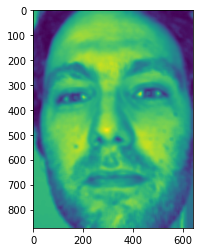

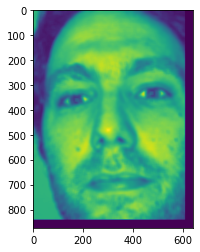

In [212]:
plt.imshow(filt_green[4])
plt.show()

plt.imshow(image)
plt.show()


In [171]:
g_signal = np.zeros(len(filt_green))
for i, frame in enumerate(filt_green):
        
    ROI = frame[550:600,250:300]
    green=np.sum(ROI / (ROI.shape[0] * ROI.shape[1]))
    g_signal[i]=green

In [172]:
signal=g_signal.copy()

In [173]:
srate = 30 # in Hz
npnts = len(signal) # 2 seconds
time  = np.arange(0,npnts)/srate

In [174]:
lin = lambda x, a, b : a * x + b 
coeff, _ = optimize.curve_fit(lin,time, signal)
signal= signal-( coeff[0] * time + coeff[1])

In [175]:
fs = 30
lowcut = 0.5
highcut=6
filtered = butter_bandpass_filter(g_signal, lowcut, highcut, fs, order=4)
detrend_filterred=butter_bandpass_filter(signal, lowcut, highcut, fs, order=4)

In [1]:
plt.plot(g_signal)
plt.show()



plt.plot(filtered)
plt.show()

plt.plot(signal)
plt.show()

plt.plot(detrend_filterred)
plt.show()


NameError: name 'plt' is not defined

In [177]:
signalX = scipy.fftpack.fft(detrend_filterred)
signalAmp = 2*np.abs(signalX)/npnts

hz = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))


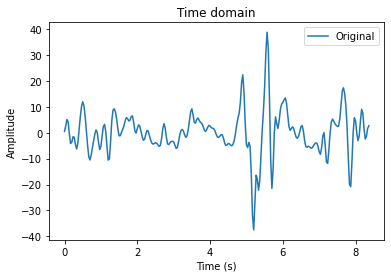

<ipython-input-178-42869737ea75>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hz,signalAmp[0:len(hz)],'k')


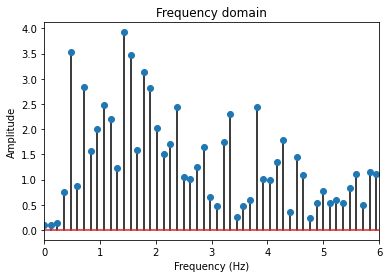

In [178]:
## plots

plt.plot(time,detrend_filterred,label='Original')
# plt.plot(time,np.real(scipy.fftpack.ifft(signalX)),'ro',label='IFFT reconstructed')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.legend()
plt.show()

plt.stem(hz,signalAmp[0:len(hz)],'k')
plt.xlim([0,6
         ])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

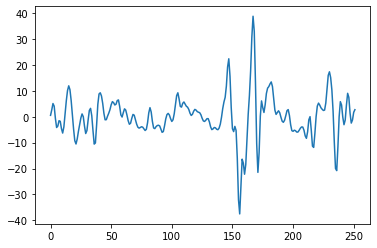

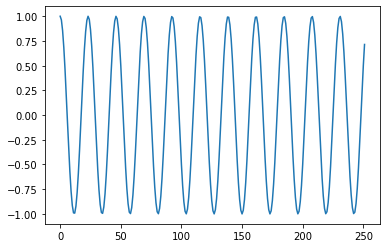

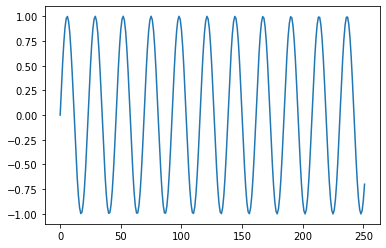

In [182]:
### REFERENCE FUNCTION ###

num_frames=len(detrend_filterred)

Fs=30
length=num_frames/Fs
n=np.arange(0,length,1/Fs)
f=1.3
y=np.exp(2*1j*np.pi*f*n)

plt.plot(detrend_filterred)
plt.show()

plt.plot(y.real)
plt.show()

plt.plot(y.imag)
plt.show()

In [183]:
mul=np.multiply(y,detrend_filterred)
np.absolute(mul).sum()

1444.4854624461639

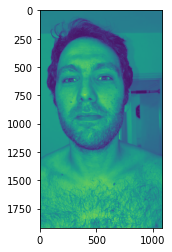

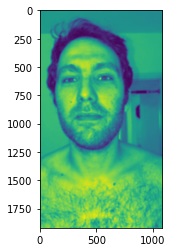

In [27]:
green=frames[0][:,:,1]

plt.imshow(green)
plt.show()

filt=ndimage.uniform_filter(green, size=15)
plt.imshow(filt)
plt.show()


252